# Imports de modules

In [20]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Liste des mesures quantitatives et qualitatives

In [21]:
# QUANTI
m_quanti = [
 'EVA',
 'Toni_diaph_G', 'Toni_diaph_D', 'Toni_diaph_EcartAbsolu',
 'Endu_exten', 'Endu_flech',
 'Bournem',
 'Incli_D', 'Incli_G',
 'Rota_D', 'Rota_G',
 'Flexi',
 'Exten']

# QUALI
m_quali = [
 'Type_respi',
 'Type_diaph',
]

# Lecture des données (ré-organisées et enregistrées dans un fichier .csv)

In [22]:
df = pd.read_csv('Data_DB_Organized.csv', sep = ';') #, encoding = "utf8")
# df = pd.read_csv('D0.csv', sep = '\t') #, encoding = "utf8")
# print(df.head(2))
# df.dtypes
# print(df.columns)

# Analyse données brutes

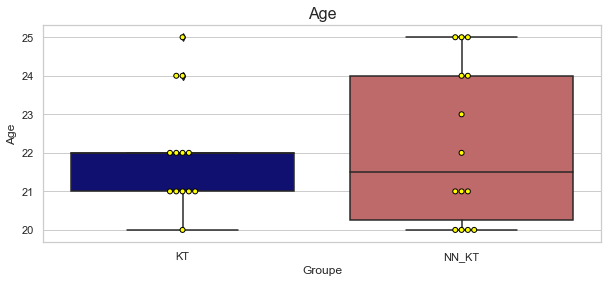

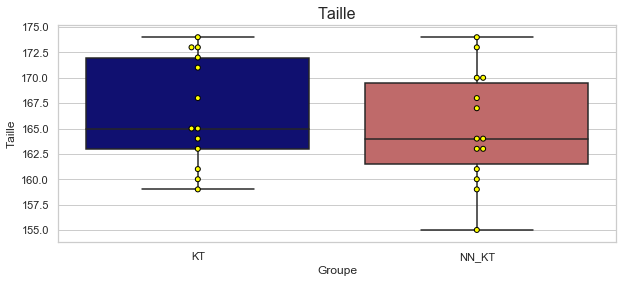

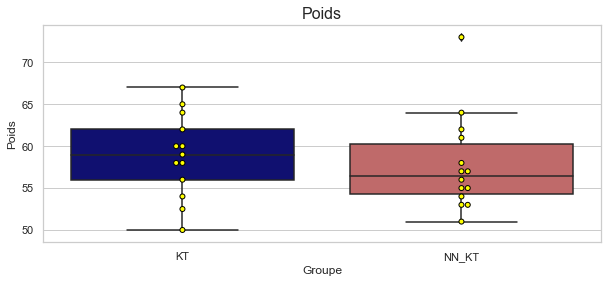

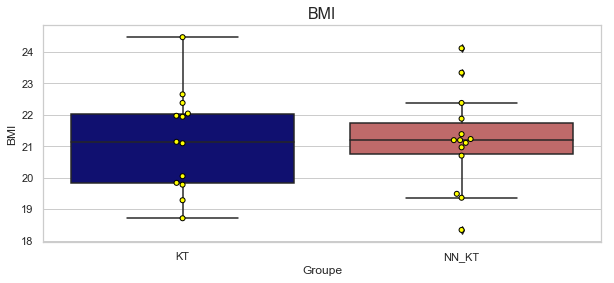

In [23]:
sns.set(style="whitegrid")
# tips = sns.load_dataset("tips")
for val in ['Age', 'Taille', 'Poids', 'BMI']:
    plt.figure(figsize=(10, 4))
    ax = sns.boxplot(data = df, x = "Groupe", y = val, palette=["navy", "indianred"])
    ax = sns.swarmplot(data = df, x = "Groupe", y = val, \
                       dodge=True, size=5, edgecolor='black', linewidth  = 1, color = "yellow")
    plt.title(val, size=16)


# Test de Mann-Whitney
## "2 échantillons proviennent-ils de la même population ?"
### Les 2 indicateurs du test sont le U_stat et la pvalue.

In [24]:
#  scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

In [25]:
df_KT = df[ df['Groupe'] == 'KT']
df_NN_KT = df[ df['Groupe'] == 'NN_KT']

In [26]:
dic = {}
for test in ['_Pr', '_Mi', '_Po1', '_Po2']:
    U_stats = []
    pvalues = []
    for m in m_quanti:
        U_stat, pvalue = stats.mannwhitneyu(x = df_KT[m + test], y = df_NN_KT[m + test])#, use_continuity=True, alternative=None)
        U_stats.append(U_stat)
        pvalues.append(round(pvalue, 3))
    dic.update({'U_stat' + test : U_stats, 'pvalue' + test : pvalues})
u_df_MW = pd.DataFrame(dic, index = m_quanti)
u_df_MW

,U_stat_Pr,pvalue_Pr,U_stat_Mi,pvalue_Mi,U_stat_Po1,pvalue_Po1,U_stat_Po2,pvalue_Po2
EVA,82.5,0.345,60.0,0.059,53.0,0.031,56.5,0.043
Toni_diaph_G,82.0,0.307,81.5,0.304,62.0,0.060,85.0,0.380
Toni_diaph_D,79.0,0.219,82.0,0.307,61.5,0.046,79.0,0.269
Toni_diaph_EcartAbsolu,69.0,0.085,73.5,0.166,73.5,0.166,86.5,0.406
Endu_exten,74.5,0.219,79.0,0.288,75.0,0.226,82.0,0.340
Endu_flech,68.5,0.142,53.5,0.036,51.5,0.029,45.0,0.013
Bournem,63.5,0.094,83.0,0.357,45.5,0.014,43.0,0.010
Incli_D,71.5,0.177,72.5,0.191,76.0,0.239,77.5,0.263
Incli_G,65.0,0.107,60.5,0.072,66.0,0.117,79.0,0.288
Rota_D,89.0,0.471,80.0,0.305,82.0,0.339,72.5,0.190


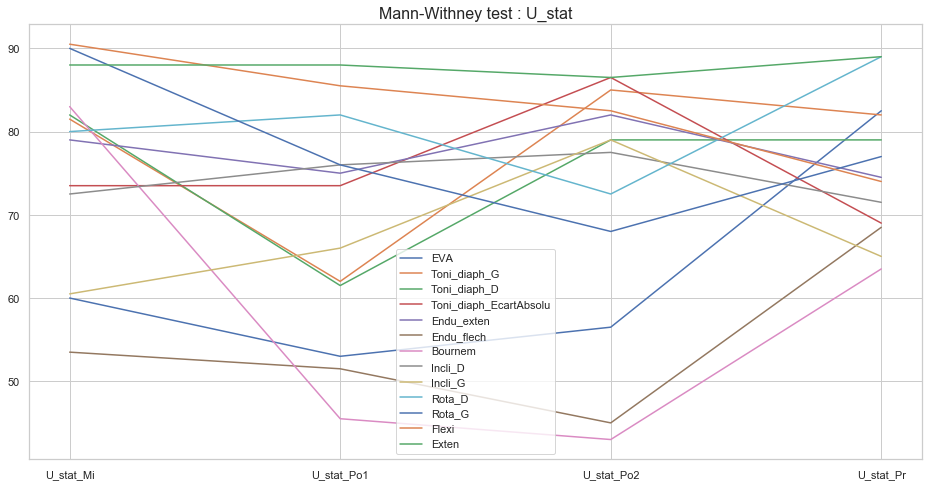

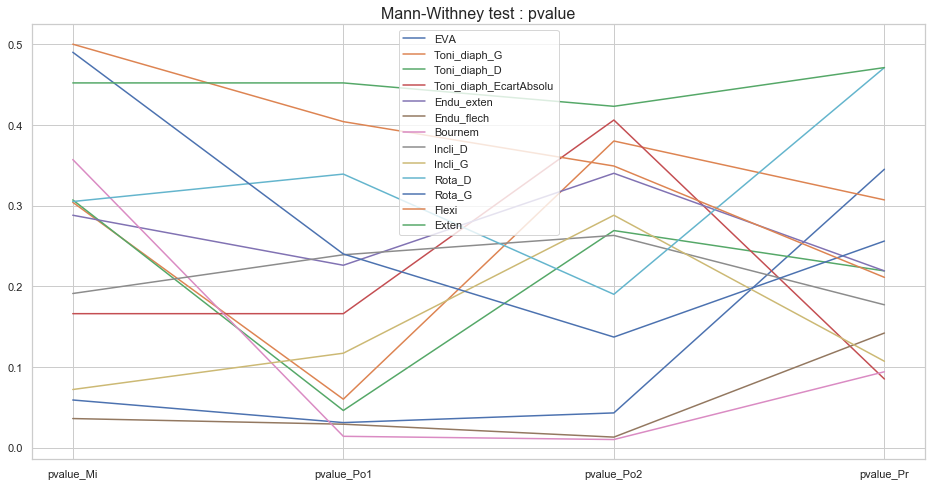

In [27]:
for indic in ['U_stat', 'pvalue']:
    columns_indic = [col for col in u_df_MW.columns if indic in col]
    u_df_indic = u_df_MW[columns_indic] # Keeping only indicator columns
    u_df_indic_T = u_df_indic.T # Transposing dataframe
    plt.figure(figsize=(16, 8))
    for m in m_quanti:
        ax = sns.lineplot(x=u_df_indic_T.index, y=m, data=u_df_indic_T, label = m)
        plt.title('Mann-Withney test : ' + indic, size=16)
        plt.ylabel('')

# Test de WilCoxon
## "Une même population a-t-elle évolué ?"
### Les 2 indicateurs du test sont le T et la pvalue.

In [28]:
# stats.wilcoxon(x, y = None, zero_method='wilcox', correction=False)

In [29]:
WilCoxon_dic = {} # Will contain Wilcoxon test results for each group

for groupe in ['KT', 'NN_KT']:
    
    dic = {}
    df_gr = df[ df['Groupe'] == groupe]

    for test in ['_Mi', '_Po1', '_Po2']:
        Ts = []
        pvalues = []
        for m in m_quanti:
    #         U_stat, pvalue = stats.mannwhitneyu(x = df_KT[m + test], y = df_NN_KT[m + test])#, use_continuity=True, alternative=None)
            T, pvalue = stats.wilcoxon(x = df_gr[m + test], y = df_gr[m + '_Pr'], zero_method='wilcox', correction=False)
#             T, pvalue = stats.wilcoxon(x = df_gr[m + test], y = df_gr[m + '_Pr'], zero_method='pratt', correction=False)
#             T, pvalue = stats.wilcoxon(x = df_gr[m + test], y = df_gr[m + '_Pr'], zero_method='zsplit', correction=False)
            Ts.append(T)
            pvalues.append(round(pvalue, 3))
        dic.update({'T' + test : Ts, 'pvalue' + test : pvalues})

    WilCoxon_dic[groupe] = pd.DataFrame(dic, index = m_quanti)

C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small fo

In [30]:
WilCoxon_dic['KT']

,T_Mi,pvalue_Mi,T_Po1,pvalue_Po1,T_Po2,pvalue_Po2
EVA,0.0,0.002,0.0,0.001,0.0,0.001
Toni_diaph_G,2.5,0.317,0.0,0.004,4.0,0.013
Toni_diaph_D,0.0,0.083,0.0,0.002,0.0,0.003
Toni_diaph_EcartAbsolu,2.0,0.564,12.0,0.705,12.0,0.705
Endu_exten,6.5,0.006,3.0,0.003,2.0,0.002
Endu_flech,17.5,0.050,5.0,0.005,5.0,0.005
Bournem,0.0,0.001,0.0,0.001,0.0,0.001
Incli_D,19.5,0.068,4.5,0.011,7.5,0.008
Incli_G,34.0,0.419,25.0,0.151,17.5,0.050
Rota_D,17.0,0.046,9.0,0.011,6.0,0.006


In [31]:
WilCoxon_dic['NN_KT']

,T_Mi,pvalue_Mi,T_Po1,pvalue_Po1,T_Po2,pvalue_Po2
EVA,4.0,0.002,0.0,0.001,0.0,0.001
Toni_diaph_G,0.0,0.025,0.0,0.006,0.0,0.006
Toni_diaph_D,0.0,NaN,0.0,0.002,0.0,0.004
Toni_diaph_EcartAbsolu,0.0,0.025,10.0,0.096,3.0,0.180
Endu_exten,22.0,0.055,15.0,0.019,15.0,0.019
Endu_flech,30.0,0.157,13.5,0.014,17.5,0.028
Bournem,0.0,0.001,1.0,0.001,3.0,0.002
Incli_D,17.0,0.026,12.5,0.021,9.5,0.020
Incli_G,17.5,0.050,14.0,0.016,21.5,0.051
Rota_D,36.5,0.314,26.0,0.096,30.0,0.158


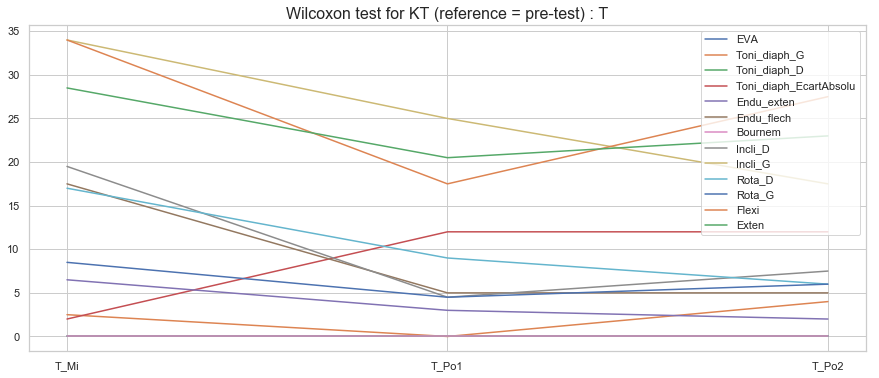

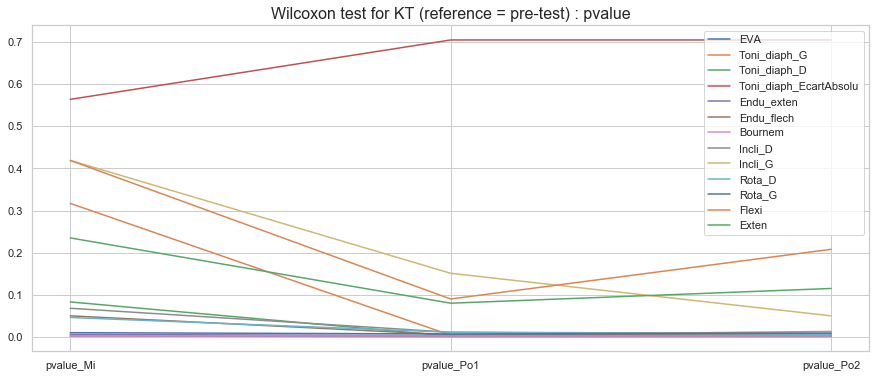

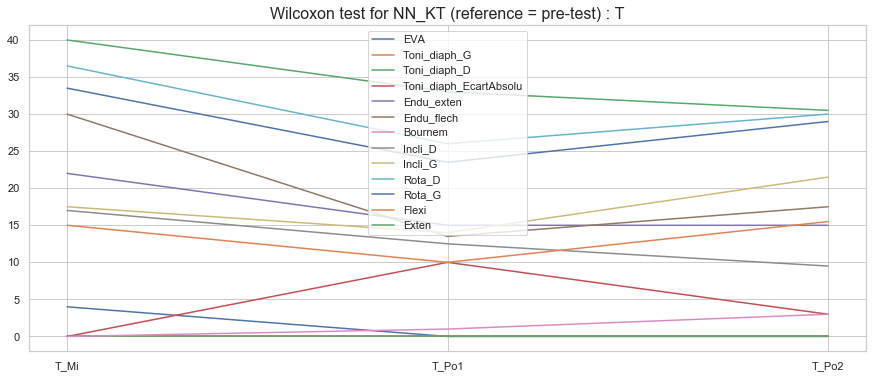

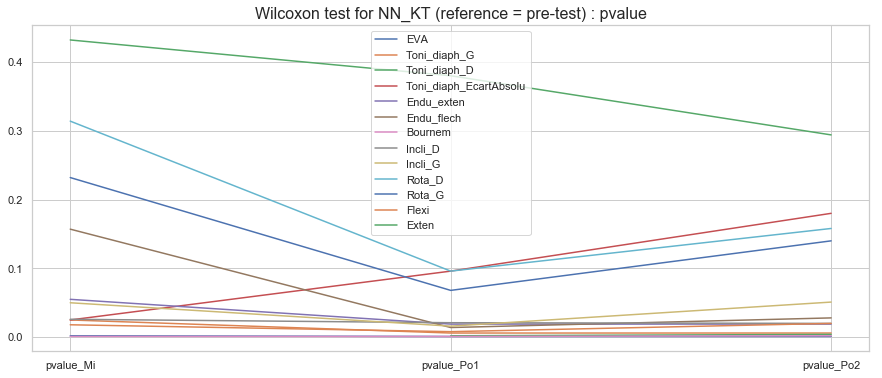

In [32]:
for group in WilCoxon_dic.keys():

    for indic in ['T', 'pvalue']:
        
        group_WilCoxon_dic = WilCoxon_dic[group]
        
        columns_indic = [col for col in group_WilCoxon_dic.columns if indic in col]
        u_df_indic = group_WilCoxon_dic[columns_indic] # Keeping only indicator columns
        u_df_indic_T = u_df_indic.T # Transposing dataframe
        plt.figure(figsize=(15, 6))
        for m in m_quanti:
            ax = sns.lineplot(x=u_df_indic_T.index, y=m, data=u_df_indic_T, label = m)
            plt.title('Wilcoxon test for ' + group + ' (reference = pre-test) : ' + indic, size=16)
            plt.ylabel('')

In [33]:
# df['diff'] = df['R1_0'] - df['R1_1']

In [34]:
# stats.wilcoxon(x = df['diff'], zero_method='wilcox', correction=False)

In [35]:
# https://pythonfordatascience.org/wilcoxon-sign-ranked-test-python/

# Evolutions des mesures
## "Comment évoluent les grandeurs mesurées au cours des tests ?""

In [36]:
df.head()

,Patient,Groupe,EVA_Pr,EVA_Mi,EVA_Po1,EVA_Po2,Age,Taille,Poids,BMI,...,Rota_G_Po2,Rota_D_Po2,Flexi_Pr,Flexi_Mi,Flexi_Po1,Flexi_Po2,Exten_Pr,Exten_Mi,Exten_Po1,Exten_Po2
0,FL,KT,5,3,0,1,22,159,50.0,19.777699,...,82,81,77,78,82,79,68,70,70,71
1,BL,KT,5,2,0,0,21,168,62.0,21.967120,...,94,90,63,98,80,88,47,57,65,69
2,BN,KT,3,3,1,1,22,173,60.0,20.047446,...,89,91,70,59,65,69,85,80,81,82
3,GC,KT,4,2,1,0,24,174,64.0,21.138856,...,91,93,83,85,86,78,68,69,70,71
4,DA,KT,8,5,3,3,25,165,60.0,22.038567,...,78,80,53,42,47,51,52,44,66,69


In [37]:
tests = ['Pr', 'Mi', 'Po1', 'Po2']

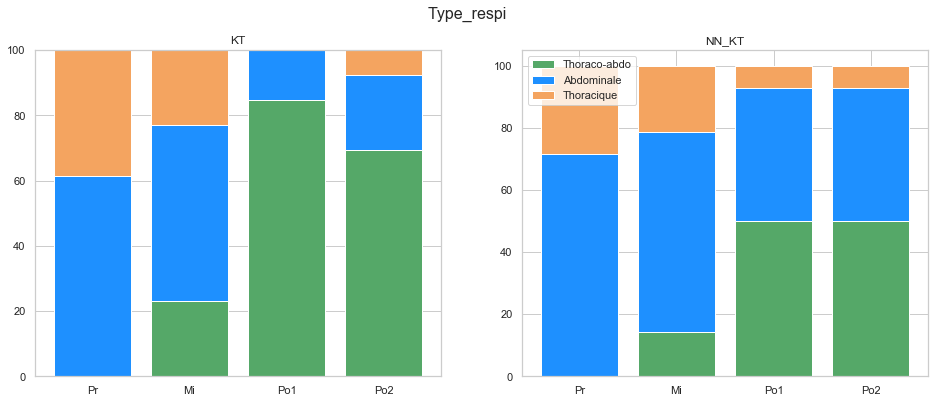

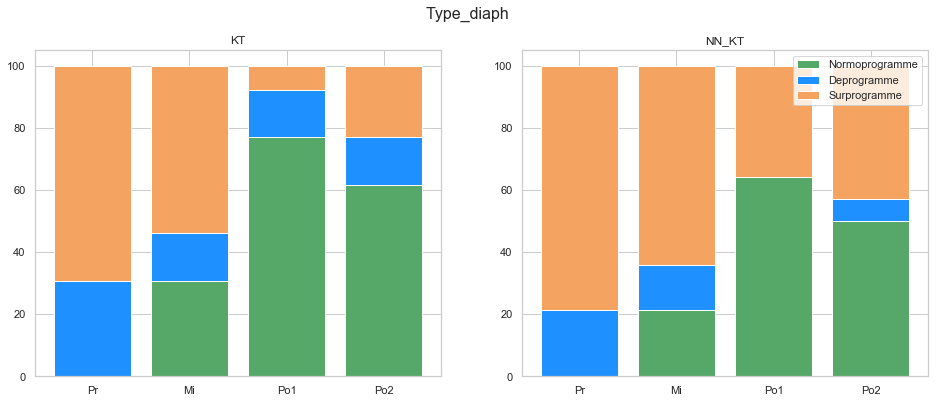

In [41]:
import numpy as np

vars_plot_list = m_quanti[:1]
vars_plot_list = m_quali[:2]
# vars_plot_list = m_quanti + m_quali

# Infos for quali measurements
Quali_Vars_Infos_dic = {}
Quali_Vars_Infos_dic['Type_respi'] = ['Thoraco-abdo', 'Abdominale', 'Thoracique']
Quali_Vars_Infos_dic['Type_diaph'] = ['Normoprogramme', 'Deprogramme', 'Surprogramme']
colors = ['g', 'dodgerblue', 'sandybrown']

for m in vars_plot_list: # For each measurement

    dic_m = {m : [], 'tests' : [], 'groups' : []}
    for test in tests: #Pour chacun des tests
        for i, serie in df.iterrows(): #Pour chaque ligne du dataframe
            dic_m[m].append(serie[m + '_' + test]) # Ajout de la valeur de la variable a la liste m du dic
            dic_m['tests'].append(test) # Ajout de la designation du test a la liste 'tests' du dic
            dic_m['groups'].append(serie['Groupe']) # Ajout de la designation du groupe a la liste 'groups' du dic

    df_m = pd.DataFrame(dic_m) # Creation du dataframe a partir du dictionnaire cree pour la variable m
    

    if m in m_quanti: # If quanti measurement
        
        plt.figure(figsize=(16, 6))
        ax = sns.boxplot(data = df_m, x = "groups", y = m, hue = "tests")
        ax = sns.swarmplot(data = df_m, x = "groups", y = m, hue = "tests", \
                           dodge=True, size=10, edgecolor='gray', linewidth  = 1)
        
        plt.figure(figsize=(16, 6))
        ax = sns.barplot(data = df_m, x = "groups", y = m, hue = "tests")
    
    if m in m_quali: # If quali measurement
        
        plt.figure(figsize=(16, 6))
        
        vals = Quali_Vars_Infos_dic[m]

        for i, group in {1:'KT', 2:'NN_KT'}.items(): # For each group
            
            pop_size = df_m[(df_m['groups'] == group)].shape[0]
            
            plt.subplot(1, 2, i)
            plt.title(group)

            bottom = [0 for i in tests]
            height = [0 for i in tests]
            for i_v, val in enumerate(vals): # For each value that m can take

                bottom = list(np.array(bottom) + np.array(height))
                height = []
                for test in tests: # For each test
                    df_isol = df_m[(df_m['groups'] == group) & (df_m['tests'] == test) & (df_m[m] == val)]
                    height.append(len(tests)*100*df_isol.shape[0]/pop_size)
                    
                plt.bar(x = tests, height = height, bottom = bottom, color=colors[i_v], label=val)

        plt.legend()
        plt.suptitle(m, size=16)
        plt.show()